# Data Audit Notebook - Team - 9

#### Load required libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#### Load labels.csv file

In [5]:
df = pd.read_csv(r"C:\Users\Nimish\Downloads\DL_project\labels .csv")
df.head()

,image_path,class_label,attributes,caption,split,instance_id
0,images/team9_calculator_01_a.jpg,calculator,color:black;material:plastic;condition:new;siz...,A blue plastic calculator on a cracked white s...,train,team9_calculator_01
1,images/team9_calculator_01_b.jpg,calculator,color:black;material:plastic;condition:new;siz...,A dark plastic calculator with colorful buttons.,train,team9_calculator_01
2,images/team9_calculator_01_c.jpg,calculator,color:black;material:plastic;condition:new;siz...,The back of a dark blue plastic calculator.,train,team9_calculator_01
3,images/team9_calculator_01_d.jpg,calculator,color:black;material:plastic;condition:new;siz...,A dark gray plastic calculator with its case.,train,team9_calculator_01
4,images/team9_calculator_01_e.jpg,calculator,color:black;material:plastic;condition:new;siz...,A dark gray plastic calculator on a white note...,train,team9_calculator_01


#### Class and Instance stats

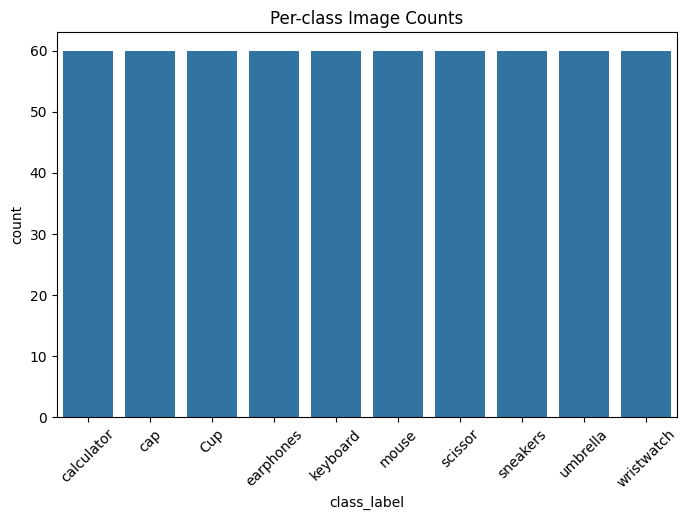

In [6]:

plt.figure(figsize=(8,5))
sns.countplot(data=df, x="class_label", order=df["class_label"].value_counts().index)
plt.title("Per-class Image Counts")
plt.xticks(rotation=45)
plt.show()

#### Histogram of images per instance_id

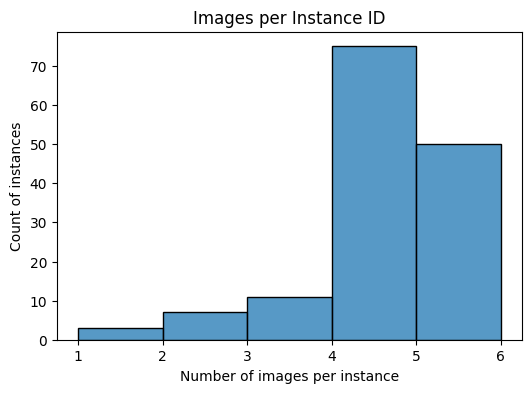

In [13]:
inst_counts = df["instance_id"].value_counts()
plt.figure(figsize=(6,4))
sns.histplot(inst_counts, bins=range(1, inst_counts.max()+2))
plt.title("Images per Instance ID")
plt.xlabel("Number of images per instance")
plt.ylabel("Count of instances")
plt.show()

#### Attribute distribution

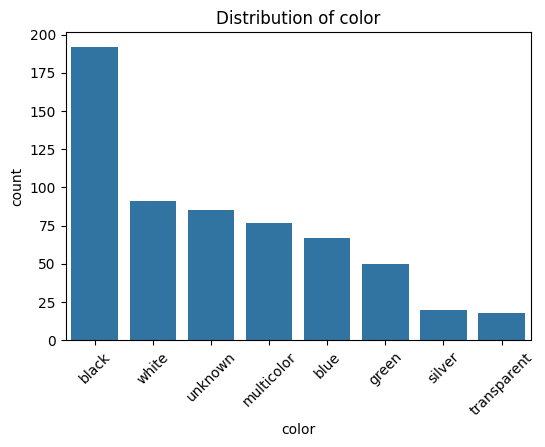

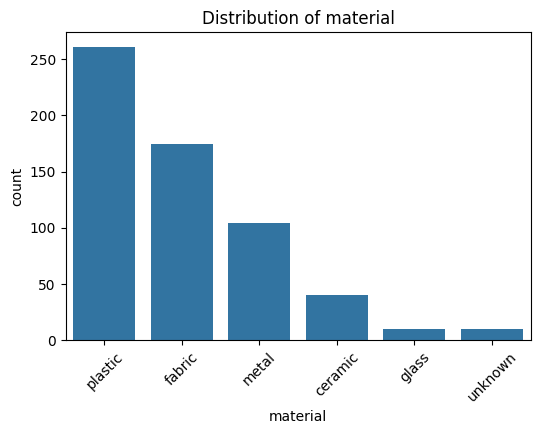

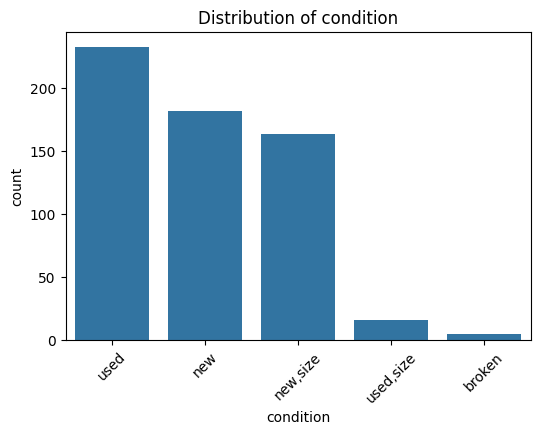

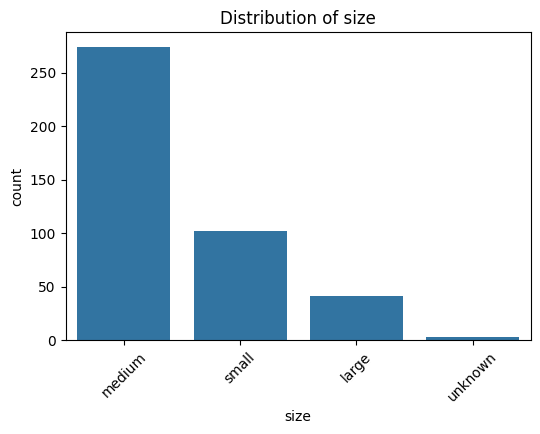

In [14]:
attr_df = df["attributes"].str.split(";", expand=True)
attr_df = attr_df.apply(lambda col: col.str.split(":").str[1])
attr_df.columns = ["color","material","condition","size"]

for col in attr_df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=attr_df, order=attr_df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

#### Split integrity: Check if any instance_id appears in both splits

In [15]:
violations = df.groupby("instance_id")["split"].nunique()
violations = violations[violations > 1]
if not violations.empty:
    print("⚠️ Split integrity violations found:")
    print(violations)
else:
    print("✅ No split integrity violations.")

✅ No split integrity violations.


#### Split counts per class

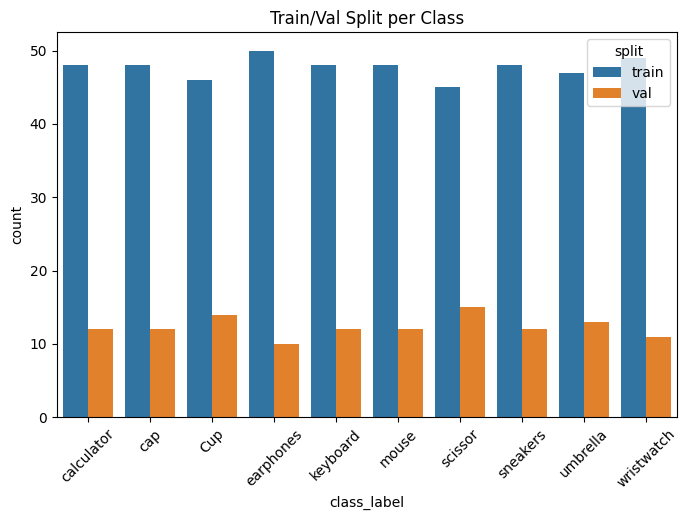

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="class_label", hue="split")
plt.title("Train/Val Split per Class")
plt.xticks(rotation=45)
plt.show()

#### Risk images

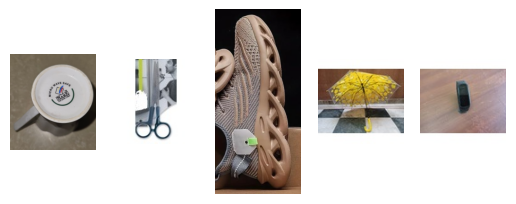

In [38]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)
img1 = mpimg.imread(r"C:\Users\Nimish\Downloads\DL_project\risk_images\team9_cup_09_b.jpg")
img2 = mpimg.imread(r"C:\Users\Nimish\Downloads\DL_project\risk_images\team9_scissor_5_d.jpg")
img3 = mpimg.imread(r"C:\Users\Nimish\Downloads\DL_project\risk_images\team9_sneakers_07_c.jpg")
img4 = mpimg.imread(r"C:\Users\Nimish\Downloads\DL_project\risk_images\team9_umbrella_7_b.jpg")
img5 = mpimg.imread(r"C:\Users\Nimish\Downloads\DL_project\risk_images\team9_wristwatch_13_d.jpg")

# Show it
ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(img3)
ax4.imshow(img4)
ax5.imshow(img5)

# optional: hide axes
ax1.axis("off")   
ax2.axis("off") 
ax3.axis("off") 
ax4.axis("off") 
ax5.axis("off") 

plt.show()


#### Some points about risk images:
1. The cup is upside down, maybe not generic shape of cup
2. Scissor is cameflouged with background
3. Shoe photo is not complete
4. Umbrella shape might get cameflouged
5. wristwatch might seems as just some recatangular object